# 1. Introduction

This project aims to predict the stress level of individuals based on various features such as sleep duration, quality of sleep, physical activity level, BMI category, blood pressure, etc. 
The dataset used contains information about individuals including their sleep habits, physical activity, and stress levels.

The dataset used: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

Mainly this dataset is used for Sleep Disorder Prediction, however I have utilized it for Stress Level Prediction as it fits the purpose.

**Data Dictionary**

1. **Person ID**: An identifier for each individual.
2. **Gender**: The gender of the person (Male/Female).
3. **Age**: The age of the person in years.
4. **Occupation**: The occupation or profession of the person.
5. **Sleep Duration (hours)**: The number of hours the person sleeps per day.
6. **Quality of Sleep (scale: 1-10)**: A subjective rating of the quality of sleep, ranging from 1 to 10.
7. **Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.
8. **Stress Level (scale: 1-10)**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. **BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. **Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. **Heart Rate (bpm)**: The resting heart rate of the person in beats per minute.
12. **Daily Steps**: The number of steps the person takes per day.


# 2. Importing Libraries

Initially, I have imported the fundamental libraries essential for data loading, exploration and visualization. I have installed the additional model based libraries and tools in the later part.



In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 3. Loading the Dataset

In [2]:
stress = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")

# 4. Data Exploration

In [3]:
# Display the first 5 rows of the dataset
stress.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
# Display the data types, non-null counts, and memory usage.
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
#Statistical summary
stress.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
stress.shape

(374, 13)

In [7]:
# Checking the null values
stress.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

We can observe that there are 219 null values in the dataset, let's correct that.

In [8]:
rows = stress[pd.isna(stress["Sleep Disorder"])]
rows

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,NaN
343,344,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,NaN


The presence of "Nan" value indicates that the individual does not have sleep disorder.
Therefore, we will replace it with the term "Nothing".

In [9]:
stress = stress.fillna("Nothing")
stress.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Nothing


Also, we can observe that in the "BMI Category" column, the term "Normal" and "Normal Weight" have same meaning. Hence, we replace the value with "Normal" for consistency.


In [10]:
stress["BMI Category"] = stress["BMI Category"].replace("Normal Weight", "Normal")

Now, let's check for duplicate entries in the 'stress' DataFrame.


In [11]:
duplicate_rows = stress[stress.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder]
Index: []


 The dataset does not have duplicate entries but it may contain same "Person ID" or "Gender".

Removing duplicate rows based on 'Person ID' and 'Gender' columns while retaining the first occurrence.

If the dataset were to contain errors or inconsistencies, such as multiple entries with the same 'Person ID' but different 'Gender' values, then including 'Gender' as a subset would help ensure that such discrepancies are addressed.

In [12]:
no_duplicates = stress.drop_duplicates(subset=['Person ID', 'Gender'])

In [13]:
stress['Stress Level'].value_counts()

Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64

Listing exact number of unique values in the columns:

In [14]:
dict = {}
for i in list(stress.columns):
    dict[i] = stress[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Person ID,374
Gender,2
Age,31
Occupation,11
Sleep Duration,27
Quality of Sleep,6
Physical Activity Level,16
Stress Level,6
BMI Category,3
Blood Pressure,25


In [15]:
stress['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

**Label Encoding**

The dataset includes categorical data, such as "Occupation", "BMI Category", and "Sleep Disorder Columns".
We perform 'Label Encoding' to convert these categorical values into numerical data. 

Label Encoding assigns a unique numerical label to each category in a categorical feature.
Algorithms used for computation, including those employed in machine learning, typically require numeric inputs for effective processing and analysis. 

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
label_encoder=LabelEncoder()

In [18]:
cat_cols=['Gender','Occupation','BMI Category','Sleep Disorder']
for col in cat_cols:
    stress[col] = label_encoder.fit_transform(stress[col])

stress.tail(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
372,373,0,59,5,8.1,9,75,3,2,140/95,68,7000,2
373,374,0,59,5,8.1,9,75,3,2,140/95,68,7000,2


In the "Blood Pressure" column, the entries are in '140/95' format. This might lead to further inconsistencies, hence we split the blood pressure into two unique columns. i.e. 'Systolic BP' and 'Diastolic BP'.

In [19]:
stress[['Systolic BP', 'Diastolic BP']] = stress['Blood Pressure'].str.split('/', expand=True)
    
# Convert the new columns to numeric type
stress[['Systolic BP', 'Diastolic BP']] = stress[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)
    
# Drop the original 'Blood Pressure' column
stress = stress.drop('Blood Pressure', axis=1)

stress.head(1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,1,27,9,6.1,6,42,6,2,77,4200,1,126,83


The 'Person ID' column does not contain relevant information as all the values are unique identifiers, so we drop it.

In [20]:
stress.drop('Person ID', axis=1, inplace=True)

Shifting the column "Stress Level" to the last position of the dataset for easier access.

In [21]:
stress_level_index = stress.columns.get_loc('Stress Level')

columns = list(stress.columns[:stress_level_index]) + list(stress.columns[stress_level_index+1:]) + ['Stress Level']

stress = stress[columns]
stress.tail(1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,Stress Level
373,0,59,5,8.1,9,75,2,68,7000,2,140,95,3


In [22]:
stress['Occupation'].unique()

array([ 9,  1,  6, 10,  5,  2,  0,  8,  3,  7,  4])

# 5. Data Visualization

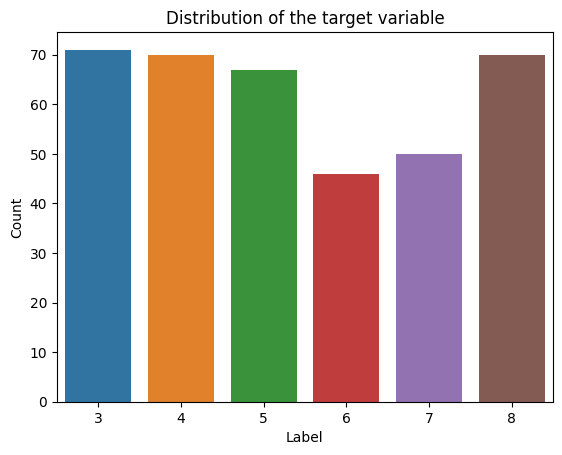

In [23]:
sns.countplot(x='Stress Level', data=stress)

plt.xlabel('Label')

plt.ylabel('Count')

plt.title('Distribution of the target variable')

# Displaying the plot
plt.show()

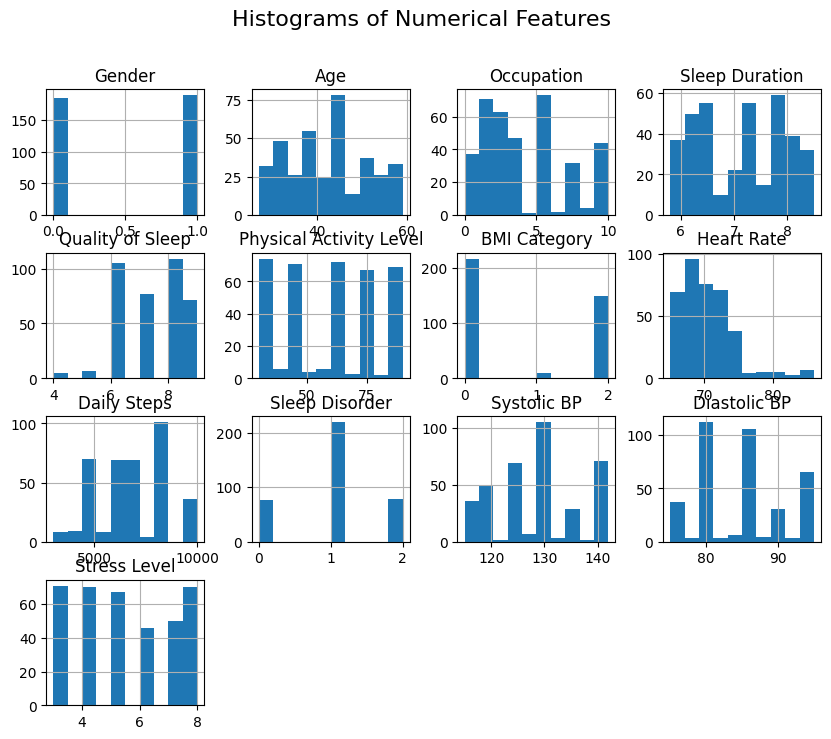

In [24]:
# Histograms for each numerical feature
stress.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

In [25]:
fig = px.violin(stress, x='Heart Rate', y='Stress Level', title='Stress Distribution by Heart Rate', color_discrete_sequence=['#FFD700'])
fig.update_layout(xaxis_title='Heart Rate', yaxis_title='Stress Level',width=600,height=500)
fig.show()

In [26]:
fig = px.pie(stress['Occupation'].value_counts(), 
              names=stress['Occupation'].value_counts().index, 
              title='Distribution of Occupation', width=600, height=500)
fig.show()

In [27]:
fig = px.box(stress, x='Stress Level', y='Occupation', title='Stress Level Distribution by Occupation', color_discrete_sequence=['lightgreen'])
fig.update_layout(xaxis_title='Stress Level', yaxis_title='Occupation', width=600, height=500)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

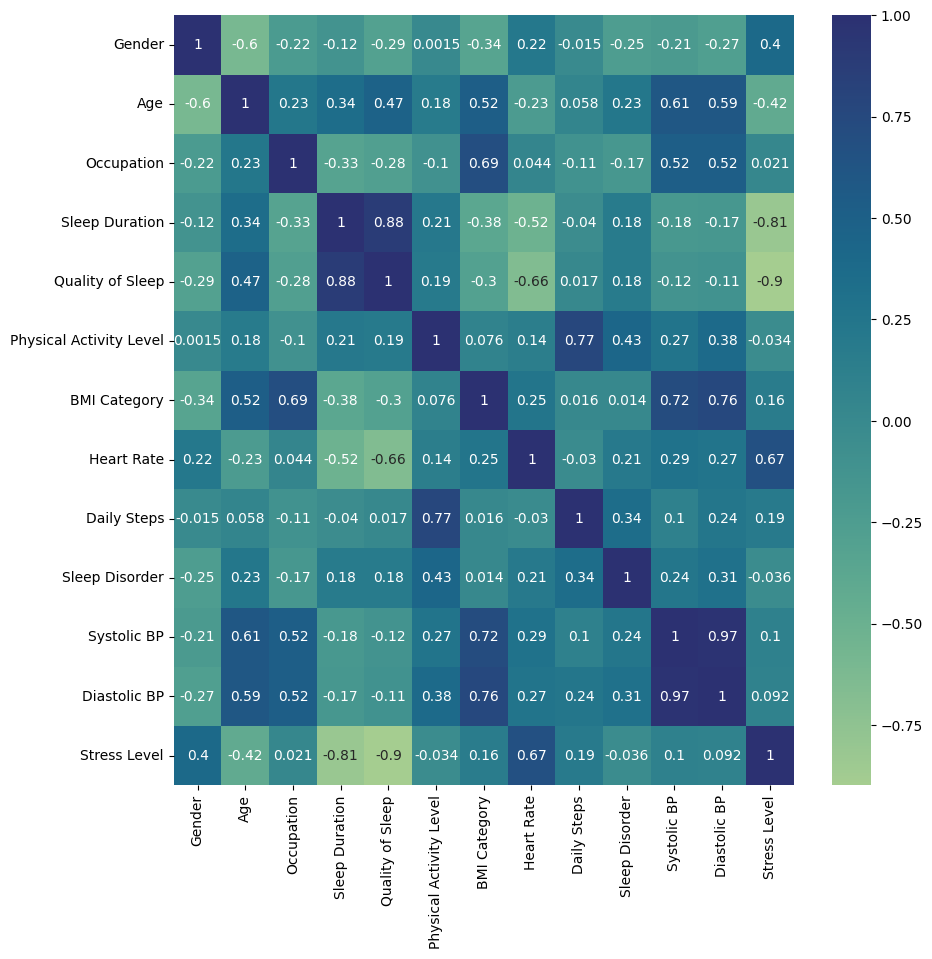

In [28]:
plt.figure(figsize = (10, 10))
sns.heatmap(stress.corr(), cmap = 'crest', annot = True)
plt.show

**Positively Correlated columns:**
* "Quality of Sleep" and "Sleep Duration" 
* "Occupation" and "BMI Category"
* "Systolic BP" and "BMI Category"
* "Diastolic BP" and "BMI Category"

**Negatively Correlated columns:**
* "Heart Rate" and "Quality of Sleep"
* "Heart Rate" and "Sleep Duration"

**No correlation with Target column: Stress level:**
* "Sleep Disorder"
* "Physical Activity Level".

Hence we drop, Sleep Disorder, Physical Activity Level, Diastolic BP and Quality of Sleep columns. 

<function matplotlib.pyplot.show(close=None, block=None)>

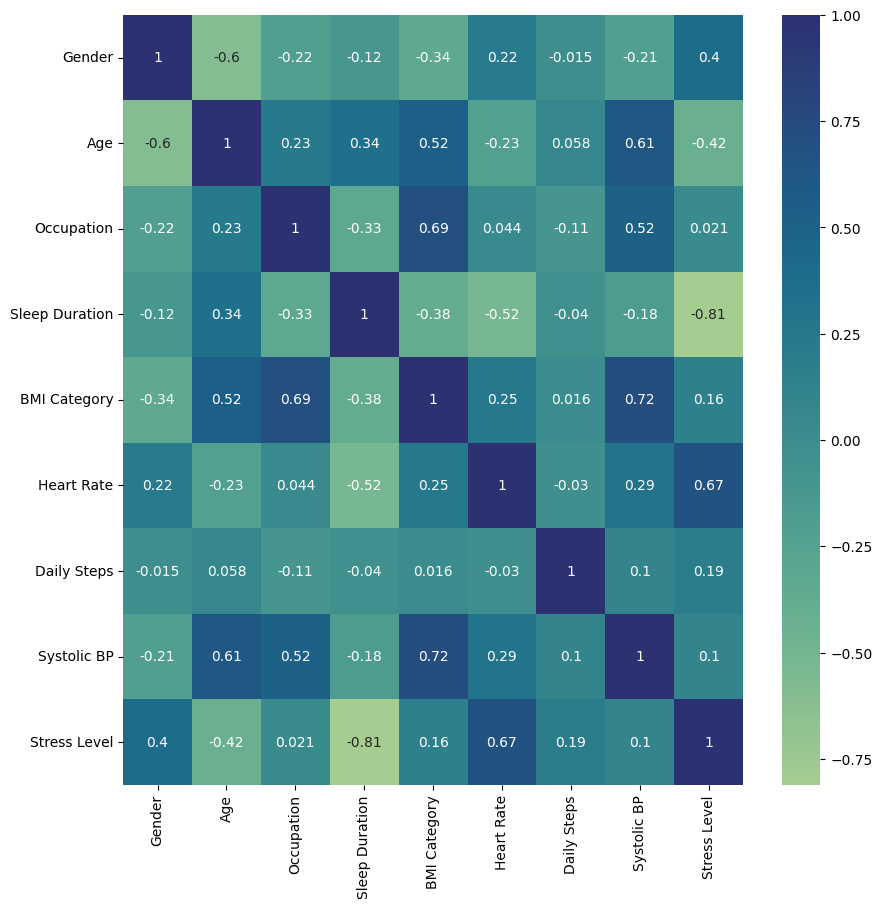

In [29]:
stress.drop('Sleep Disorder', axis=1, inplace=True)
stress.drop('Physical Activity Level', axis=1, inplace=True)
stress.drop('Diastolic BP', axis=1, inplace=True)
stress.drop('Quality of Sleep', axis=1, inplace=True)

#Plot the heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(stress.corr(), cmap = 'crest', annot = True)
plt.show

In [30]:
stress.head(1)


,Gender,Age,Occupation,Sleep Duration,BMI Category,Heart Rate,Daily Steps,Systolic BP,Stress Level
0,1,27,9,6.1,2,77,4200,126,6


# 6. Importing Modules & Packages

In [31]:
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report       # Import the classification_report function for detailed classification metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier    
from sklearn.tree import DecisionTreeClassifier        
from sklearn import svm                         
from sklearn.naive_bayes import GaussianNB            
from sklearn.neighbors import KNeighborsClassifier  


# 7. Data Preparation

In [32]:
# Split the data into features (X) and the target variable (y)
X = stress.drop(['Stress Level'], axis=1)
y = stress['Stress Level']

In [33]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (299, 8)
y_train shape: (299,)
X_test shape: (75, 8)
y_test shape: (75,)


In [34]:
X_train

,Gender,Age,Occupation,Sleep Duration,BMI Category,Heart Rate,Daily Steps,Systolic BP
192,1,43,7,6.5,2,72,6000,130
75,1,33,1,6.0,0,72,5000,125
84,1,35,9,7.5,0,70,8000,120
362,0,59,5,8.2,2,68,7000,140
16,0,29,5,6.5,0,80,4000,132
...,...,...,...,...,...,...,...,...
71,1,33,1,6.1,0,72,5000,125
106,0,37,5,6.1,2,77,4200,126
270,0,49,5,6.1,2,75,10000,140
348,0,57,5,8.2,2,68,7000,140


# A. Logistic Regression

In [35]:
# Instantiating the object and fitting
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the values
predicted = model.predict(X_test)

# Confusion matrix
conf = confusion_matrix(y_test, predicted)
print("Confusion Matrix : \n", conf)

cr = classification_report(y_test, predicted)
print("Classification Report:\n", cr)

# Printing the test accuracy
print("The test accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted) * 100, "%")

Confusion Matrix : 
 [[12  0  0  0  0  0]
 [ 0  4  0  0  0  6]
 [ 0  1 11  0  2  0]
 [ 0  1  0  8  1  0]
 [ 1 10  0  0  1  0]
 [ 0  9  5  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.92      1.00      0.96        12
           4       0.16      0.40      0.23        10
           5       0.69      0.79      0.73        14
           6       0.89      0.80      0.84        10
           7       0.17      0.08      0.11        12
           8       0.00      0.00      0.00        17

    accuracy                           0.48        75
   macro avg       0.47      0.51      0.48        75
weighted avg       0.44      0.48      0.45        75

The test accuracy of Logistic Regression is :  48.0 %


# B. Naive Bayes

In [36]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [37]:
naive_bayes.score(X_test,y_test)

0.9066666666666666

In [38]:
y_predict = naive_bayes.predict(X_test)

In [39]:
matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  8  1  1  0  0]
 [ 1  0 12  0  1  0]
 [ 0  1  0  8  0  1]
 [ 0  0  0  0 12  0]
 [ 0  0  0  1  0 16]]


In [40]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           3       0.92      1.00      0.96        12
           4       0.89      0.80      0.84        10
           5       0.92      0.86      0.89        14
           6       0.80      0.80      0.80        10
           7       0.92      1.00      0.96        12
           8       0.94      0.94      0.94        17

    accuracy                           0.91        75
   macro avg       0.90      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75



Naive Bayes Model gives an accuracy of 91%. 

# C. Support Vector Mechanism

In [41]:
svm_classifier = svm.SVC(kernel='linear') 

In [42]:
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)


In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9066666666666666


In [44]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 11  1  2  0]
 [ 0  1  0  9  0  0]
 [ 0  0  0  1 11  0]
 [ 0  0  0  0  2 15]]
Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.91      1.00      0.95        10
           5       1.00      0.79      0.88        14
           6       0.82      0.90      0.86        10
           7       0.73      0.92      0.81        12
           8       1.00      0.88      0.94        17

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.92      0.91      0.91        75



The accuracy of SVM is 91%.

# D. KNN Classifier


In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
knn.score(X_test,y_test)


0.9333333333333333

In [47]:
y_predict = knn.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 13  1  0  0]
 [ 0  1  0  8  1  0]
 [ 0  0  0  0 12  0]
 [ 0  0  2  0  0 15]]


In [48]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.91      1.00      0.95        10
           5       0.87      0.93      0.90        14
           6       0.89      0.80      0.84        10
           7       0.92      1.00      0.96        12
           8       1.00      0.88      0.94        17

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75




KNN Classifier model demostrates an accuracy of approx 93%.

# E. Random Forest Classifier


In [49]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

In [50]:
random_forest.score(X_test,y_test)

0.9733333333333334

In [51]:
y_predict = random_forest.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 12  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]


In [52]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        10
           5       1.00      0.86      0.92        14
           6       0.83      1.00      0.91        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75



The Random Forest model demonstrates high precision, recall, and F1-score for most stress levels, indicating robust performance with 97% accuracy.


# F. Decision Tree

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
decision_tree.score(X_test,y_test)

0.9733333333333334

In [55]:
y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  1 12  1  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 17]]


In [56]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.91      1.00      0.95        10
           5       1.00      0.86      0.92        14
           6       0.91      1.00      0.95        10
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        17

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75



The Decision Tree model has an accuracy of 97%.
 Overall, the model demonstrates high accuracy and balanced performance across different stress levels.

In [57]:
model_names = ['Logistic Regression', 'Naive Bayes',  'SVM', 'KNN', 'Random Forest', 'Decision Tree',]
accuracy_scores = [48, 91, 91, 93, 97, 97]  
, 
data = {'Model': model_names, 'Accuracy Score': accuracy_scores}

df = pd.DataFrame(data)

colors = px.colors.qualitative.Pastel

fig = px.bar(df, x='Model', y='Accuracy Score', text='Accuracy Score', 
             title='Comparison of Model Accuracy', color='Model',
             color_discrete_map={model: color for model, color in zip(model_names, colors)})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

# 8.  Conclusion

The Random Forest Classifier and Decision Tree models emerged as the top performers, achieving good accuracy scores of 96% and 97%, respectively. 
Logistic Regression showed notably lower performance at 48%. 

Furthermore, it's important to acknowledge the impact of data size on model performance. With a relatively small dataset, the ability of models to generalize might be compromised, leading to variations in performance.

 Additionally, fine-tuning model parameters and exploring ensemble methods could further improve predictive accuracy. Overall, this project contributes to our understanding of stress level detection and highlights avenues for future exploration in the field of mental health prediction.

# 9. Stress Level Detection


Here, I have used Random Forest model for the detection.

Once we input the values of the columns, we get the Stress Level as output. 


In [58]:
def get_user_input():
    gender = int(input("Gender (Male: 1, Female: 0): "))
    age = int(input("Age: "))
    print( "['Scientist =0','Doctor =1 ', 'Accountant =2', 'Teacher =3','Manager =4', 'Engineer = 5', 'Sales Representative =6', 'Lawyer =8','Salesperson =7','Software Engineer = 9', 'Nurse = 10']")   
    occupation = int(input("Occupation (encoded): "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    bmi_category = int(input("BMI Category (Underweight: 1, Normal: 2, Overweight: 3): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    daily_steps = int(input("Daily Steps: "))
    systolic_bp = int(input("Systolic Blood Pressure: "))
    
    return np.array([[gender, age, occupation, sleep_duration, bmi_category, heart_rate, daily_steps, systolic_bp]])

# Uncomment the below code to run random forest on your own inputs.

#user_input = get_user_input()

#predicted_stress_level = random_forest.predict(user_input)

#print("Predicted Stress Level:", predicted_stress_level[0])